In [383]:
import pandas as pd
gamestats = pd.read_csv('C:\\Users\\hkhoi\\Desktop\\Python Practice\Dataset\\17k-apple-app-store-strategy-games\\appstore_games.csv')

In [384]:
#gamestats.describe()
gamestatsf=gamestats

In [385]:
# Drop unused rows and columns
gamestatsf = gamestatsf.drop(columns="URL")
gamestatsf = gamestatsf.drop(columns="Icon URL")


In [386]:
gamestatsf.columns= ['ID', 'Name','Subtitle','User_Rating','User_Rating_Count','Price','In_App_Purchase','Desc','Dev','Age_Rating','Languages','Size','Primary_Genre','Genre','Release_Date','Current_Version_date']



In [387]:
#Drop games that has no rating
gamestatsf = gamestatsf[pd.notnull(gamestatsf['User_Rating'])]

#Drop games that has rating less than 1% of maximum user rating count
#Low_User_Count=gamestatsf[gamestatsf.User_Rating_Count < (gamestatsf['User_Rating_Count'].max())*0.0001].index
Low_User_Count=gamestatsf[gamestatsf.User_Rating_Count < 200].index
gamestatsf.drop(Low_User_Count , inplace=True)

In [388]:
gamestatsf['Size2'] = round(gamestatsf['Size']/1000000,1)



In [389]:
gamestatsf.User_Rating_Count.max()

3032734.0

In [598]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

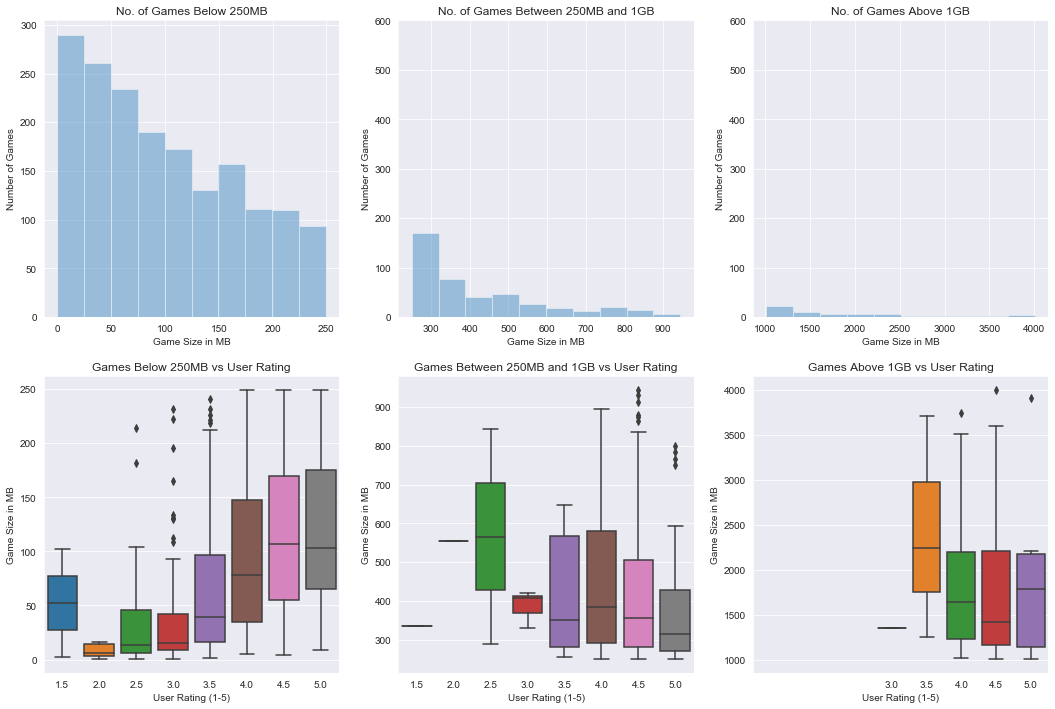

In [391]:
Size_Less_250MB = gamestatsf[gamestatsf.Size2 <250]
Size_More_250MB = gamestatsf[(gamestatsf.Size2 >=250) & (gamestatsf.Size2 <1000)]
Size_More_1GB = gamestatsf[gamestatsf.Size2 >=1000]


sns.set_style('darkgrid')
f, axes = plt.subplots (2,3, figsize=(18,12))



vis1 = sns.boxplot( data = Size_Less_250MB, x = 'User_Rating', y = 'Size2',  ax=axes[1,0])
vis2 = sns.boxplot( data = Size_More_250MB, x = 'User_Rating', y = 'Size2', ax=axes[1,1])
vis3 = sns.boxplot( data = Size_More_1GB, x = 'User_Rating', y = 'Size2', ax=axes[1,2],)
vis4 = sns.distplot(Size_Less_250MB.Size2, bins= 10, kde=False,ax=axes[0,0])
vis5 = sns.distplot(Size_More_250MB.Size2, bins= 10, kde=False,ax=axes[0,1])
vis6 = sns.distplot(Size_More_1GB.Size2, bins= 10, kde=False,ax=axes[0,2])

vis1.set(xlabel='User Rating (1-5)',ylabel='Game Size in MB')
vis2.set(xlabel='User Rating (1-5)',ylabel='Game Size in MB')
vis3.set(xlabel='User Rating (1-5)',ylabel='Game Size in MB')
vis4.set(xlabel='Game Size in MB',ylabel='Number of Games')
vis5.set(xlabel='Game Size in MB',ylabel='Number of Games')
vis6.set(xlabel='Game Size in MB',ylabel='Number of Games')

axes[0, 0].set_title('No. of Games Below 250MB')
axes[0, 1].set_title('No. of Games Between 250MB and 1GB')
axes[0, 2].set_title('No. of Games Above 1GB')
axes[1, 0].set_title('Games Below 250MB vs User Rating')
axes[1, 1].set_title('Games Between 250MB and 1GB vs User Rating')
axes[1, 2].set_title('Games Above 1GB vs User Rating')
vis3.set(xlim=(-4, 4.5))

vis5.set(ylim=(0, 600))
vis6.set(ylim=(0, 600))

plt.ioff()

----- GENRES------

In [567]:
gamestatsfg = gamestatsf.copy()


In [568]:
gamestatsfg['Genre'] = gamestatsfg['Genre'].str.replace(',', '').str.replace('Games', '').str.replace('Entertainment', '').str.replace('Strategy', '') 
gamestatsfg['Genre'] = gamestatsfg['Genre'].str.split(' ').map(lambda x: ' '.join(sorted(x)))
gamestatsfg['Genre']=gamestatsfg['Genre'].str.strip()

In [633]:
#gamestatsfg.Genre.unique()

In [570]:
Non_Main_Genre=gamestatsfg[~gamestatsfg.Genre.str.contains('Puzzle') & \
                           ~gamestatsfg.Genre.str.contains('Action') & \
                           ~gamestatsfg.Genre.str.contains('Family')& \
                           ~gamestatsfg.Genre.str.contains('Education')& \
                           ~gamestatsfg.Genre.str.contains('Family')& \
                           ~gamestatsfg.Genre.str.contains('Adventure')&\
                           ~gamestatsfg.Genre.str.contains('Board')&\
                           ~gamestatsfg.Genre.str.contains('Role')].index
gamestatsfg.drop(Non_Main_Genre , inplace=True)

In [634]:
#gamestatsfg.Genre.unique()

In [572]:
gamestatsfg.loc[gamestatsfg['Genre'].str.contains('Puzzle'),'Genre'] = 'Puzzle'
gamestatsfg.loc[gamestatsfg['Genre'].str.contains('Board'),'Genre'] = 'Puzzle'
gamestatsfg.loc[gamestatsfg['Genre'].str.contains('Action'),'Genre'] = 'Action'
gamestatsfg.loc[gamestatsfg['Genre'].str.contains('Adventure'),'Genre'] = 'Adventure'
gamestatsfg.loc[gamestatsfg['Genre'].str.contains('Role'),'Genre'] = 'Adventure'
gamestatsfg.loc[gamestatsfg['Genre'].str.contains('Family'),'Genre'] = 'Family'
gamestatsfg.loc[gamestatsfg['Genre'].str.contains('Education'),'Genre'] = 'Family'
    
    

In [635]:
gamestatsfg.Genre.unique()

array(['Puzzle', 'Action', 'Adventure', 'Family'], dtype=object)

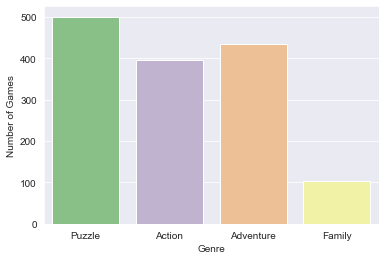

In [640]:
x=['Puzzle','Action','Adventure','Family']
y = [gamestatsfg.Genre[(gamestatsfg['Genre']=='Puzzle')].count(),gamestatsfg.Genre[(gamestatsfg['Genre']=='Action')].count(),\
     gamestatsfg.Genre[(gamestatsfg['Genre']=='Adventure')].count(),gamestatsfg.Genre[(gamestatsfg['Genre']=='Family')].count()]

vis1= sns.barplot(x,y,palette='Accent')
vis1.set(xlabel='Genre',ylabel='Number of Games')
plt.ioff()

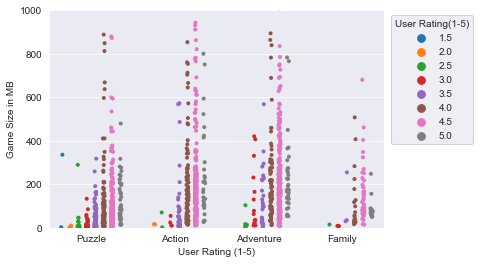

In [637]:
vis1= sns.stripplot(y='Size2' , x='Genre', data=gamestatsfg,\
                hue='User_Rating',dodge=True, size=4)

plt.legend(title='User Rating(1-5)',bbox_to_anchor=(1.28, 1))

vis1.set(ylim=(0, 1000))
vis1.set(xlabel='User Rating (1-5)',ylabel='Game Size in MB')
plt.ioff()